In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,NaN,NaN,0.06,NaN,NaN,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,NaN,13.21,3.69,1.29,NaN,NaN,NaN,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,NaN,NaN,0.00,NaN,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	33
float64		column 2	30
float64		column 3	50
float64		column 4	30
float64		column 5	53
float64		column 6	43
float64		column 7	83
float64		column 8	50
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,181.000000,184.000000,164.000000,184.000000,161.000000,171.000000,131.000000,164.000000,214.000000
mean,1.518411,13.388152,2.730854,1.420598,72.685963,0.473450,8.848626,0.146524,0.057009
std,0.003086,0.840114,1.410047,0.508304,0.663724,0.531016,1.218465,0.439156,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.790000,0.000000,0.000000
25%,1.516550,12.877500,2.260000,1.187500,72.320000,0.140000,8.270000,0.000000,0.000000
50%,1.517690,13.270000,3.480000,1.350000,72.830000,0.560000,8.560000,0.000000,0.000000
75%,1.519180,13.802500,3.600000,1.620000,73.100000,0.610000,9.075000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,74.550000,6.210000,14.680000,2.880000,0.510000


<AxesSubplot:>

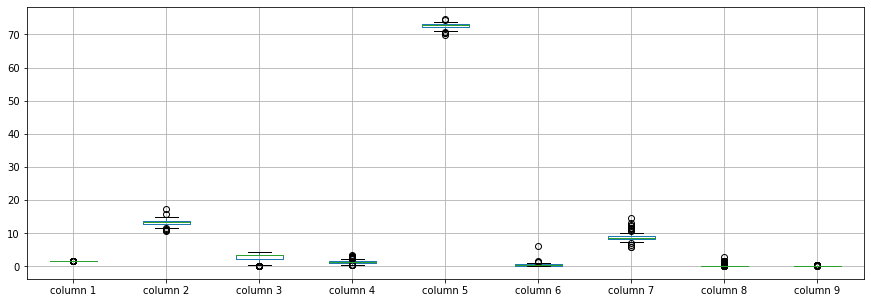

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518411
column 2    13.388152
column 3     2.730854
column 4     1.420598
column 5    72.685963
column 6     0.473450
column 7     8.848626
column 8     0.146524
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.194187,-0.135349,-0.368095,-0.457854,-0.252459,0.740341,-0.131045,0.141745
column 2,-0.194187,1.000000,-0.194838,0.066393,-0.227631,-0.270403,-0.258447,0.445906,-0.240225
column 3,-0.135349,-0.194838,1.000000,-0.425784,-0.263676,0.044232,-0.397044,-0.565104,0.096482
column 4,-0.368095,0.066393,-0.425784,1.000000,-0.059558,0.322501,-0.293606,0.445677,-0.109526
column 5,-0.457854,-0.227631,-0.263676,-0.059558,1.000000,-0.292633,0.021853,0.102315,0.005407
column 6,-0.252459,-0.270403,0.044232,0.322501,-0.292633,1.000000,-0.342918,-0.084881,0.027310
column 7,0.740341,-0.258447,-0.397044,-0.293606,0.021853,-0.342918,1.000000,-0.216807,0.144102
column 8,-0.131045,0.445906,-0.565104,0.445677,0.102315,-0.084881,-0.216807,1.000000,-0.155121
column 9,0.141745,-0.240225,0.096482,-0.109526,0.005407,0.027310,0.144102,-0.155121,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+24,9+24+24,9+24+24+24,9+24+24+24+24,9+24+24+24+24+24,9+24+24+24+24+24+24,9+24+24+24+24+24,9+24+24+24+24,9+24+24+24,9+24+24,9+24,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 77.18019045316257
Epoch: 1 , loss: 77.3379994905912
Epoch: 2 , loss: 77.61106080275316
Epoch: 3 , loss: 77.27426558274489
Epoch: 4 , loss: 77.97732221163236
Epoch: 5 , loss: 77.93777231069711
Epoch: 6 , loss: 77.10854251568134
Epoch: 7 , loss: 77.18397169846754
Epoch: 8 , loss: 77.60365530160757
Epoch: 9 , loss: 77.59162403987004
Epoch: 10 , loss: 76.9990601172814
Epoch: 11 , loss: 77.09264432466946
Epoch: 12 , loss: 77.96239471435547
Epoch: 13 , loss: 77.4795174231896
Epoch: 14 , loss: 77.15538083589993
Epoch: 15 , loss: 77.46593328622671
Epoch: 16 , loss: 76.8532101557805
Epoch: 17 , loss: 76.88769912719727
Epoch: 18 , loss: 77.2938340994028
Epoch: 19 , loss: 77.98454108605019
Epoch: 20 , loss: 76.65110133244441
Epoch: 21 , loss: 77.08662355863132
Epoch: 22 , loss: 77.83478135329027
Epoch: 23 , loss: 77.1716531606821
Epoch: 24 , loss: 76.85109681349535
Epoch: 25 , loss: 76.87095612746019
Epoch: 26 , l

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0.0,-0.011997,-59.290303,0.000000,-0.028150,0.105115,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.446043,0.0,0.0,0.000000,-62.197946,-0.234111,-1.060186,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
210,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
211,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
212,0.000000,0.0,0.0,-1.363195,-68.627118,0.000000,-4.986117,-1.541633,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(464.4078750252098, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.42589192109052226

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.64,4.49,1.088003,12.489697,0.060000,8.721850,0.105115,0.0
1,1.517610,13.89,3.60,1.360000,72.730000,0.480000,7.830000,0.000000,0.0
2,1.516180,13.53,3.55,1.540000,72.990000,0.390000,7.780000,0.000000,0.0
3,1.071617,13.21,3.69,1.290000,10.412054,0.335889,7.159814,0.000000,0.0
4,1.517420,13.27,3.62,1.240000,73.080000,0.550000,8.070000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.14,0.00,2.880000,72.610000,0.080000,9.180000,1.060000,0.0
210,1.516850,14.92,0.00,1.990000,73.060000,0.000000,8.400000,1.590000,0.0
211,1.520650,14.36,0.00,2.020000,73.420000,0.000000,8.440000,1.640000,0.0
212,1.516510,14.38,0.00,0.576805,4.982882,0.000000,3.493883,0.028367,0.0


In [20]:
imputations[-1].to_excel("Glass_AG_20(imp).xlsx", index=False, header=False)